# Task 1: Working with a dataset with categorical features
In Assignment 1A, we didn't have to do much preprocessing, because all the features in the two datasets were numerical. (Actually, in the second dataset, we removed all non-numerical features.) In this assignment, we'll instead consider how to deal with non-numerical features.

We'll use the famous Adult dataset. This is a binary classification task, where our task is to predict whether an American individual earns more than $50,000 a year, given a number of numerical and categorical features. (The dataset was extracted from a 1994 census database.)

# Step 1. Reading the data 
Please download the two CSV files, the training set and the test set, and save them into your working directory This is the official train/test split defined by the people who created the dataset. It's the same data as in the the public distribution, except that we converted the format into a standard CSV format. 
Write code to read the CSV file, for instance by using Pandas as in Assignment 1A. Then split the data into an input part X and an output part Y. The output variable, which the classifier will predict, is called target. 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

  
# Read the CSV file.
data_train = pd.read_csv('adult_train.csv')
data_test = pd.read_csv('adult_test.csv')
data_train_shuffled = data_train.sample(frac=1.0, random_state=0)
data_test_shuffled = data_test.sample(frac=1.0, random_state=0)
X_train = data_train_shuffled.drop('target', axis=1)
Y_train=data_train_shuffled['target'].dropna()
X_test = data_test_shuffled.drop('target', axis=1)
Y_test=data_test_shuffled['target'].dropna()


# Step 2: Encoding the features as numbers. 
If you look at the data, you will note that it contains several features with categorical values, such as workclass, education etc. All scikit-learn models work with numerical data internally; this means that the categorical features need to be converted to numbers. The most straightforward way to carry out such a conversion is to use one-hot encoding of the features, also known as dummy variables in statistics. In this approach, we define one new column for each observed value of the feature. 
Scikit-learn includes a number of tools that can do one-hot encoding of categorical features and we'll see how to use one of them, the DictVectorizer. An alternative approach that is a bit more Pandas-friendly and gives more low-level control is to use the recently introduced ColumnTransformer; if you're interested, you can read an introduction to this approach here. We won't use a ColumnTransformer here because it will make Task 3 in this assignment a bit too annoying to solve. 
The DictVectorizer is used when we store our features as named attributes in dictionaries. For instance, we could represent one individual from the Adult dataset as follows: 

In [3]:
from sklearn.feature_extraction import DictVectorizer
X_train_dicts = X_train.to_dict('records')
X_test_dicts=X_test.to_dict('records')
dv = DictVectorizer()
print(X_train_dicts)
X_train_encoded = dv.fit_transform(X_train_dicts)
print(X_train_encoded)
X_test_encoded = dv.transform(X_test_dicts)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  (0, 0)	49.0
  (0, 1)	0.0
  (0, 2)	0.0
  (0, 3)	9.0
  (0, 15)	1.0
  (0, 20)	110172.0
  (0, 21)	40.0
  (0, 24)	1.0
  (0, 68)	1.0
  (0, 85)	1.0
  (0, 90)	1.0
  (0, 91)	1.0
  (0, 98)	1.0
  (0, 101)	1.0
  (1, 0)	49.0
  (1, 1)	0.0
  (1, 2)	0.0
  (1, 3)	9.0
  (1, 15)	1.0
  (1, 20)	105431.0
  (1, 21)	40.0
  (1, 22)	1.0
  (1, 68)	1.0
  (1, 79)	1.0
  (1, 88)	1.0
  :	:
  (32559, 3)	13.0
  (32559, 13)	1.0
  (32559, 20)	194636.0
  (32559, 21)	45.0
  (32559, 24)	1.0
  (32559, 68)	1.0
  (32559, 81)	1.0
  (32559, 90)	1.0
  (32559, 91)	1.0
  (32559, 98)	1.0
  (32559, 103)	1.0
  (32560, 0)	25.0
  (32560, 1)	0.0
  (32560, 2)	0.0
  (32560, 3)	8.0
  (32560, 6)	1.0
  (32560, 20)	374163.0
  (32560, 21)	60.0
  (32560, 24)	1.0
  (32560, 55)	1.0
  (32560, 76)	1.0
  (32560, 89)	1.0
  (32560, 91)	1.0
  (32560, 98)	1.0
  (32560, 103)	1.0


# Step 3. Combining the steps. 
In the example above, we first transformed the list of dictionaries into a numerical matrix, and then we used this matrix when training the classifier. A separate preprocessing step was carried out for the test set. 
In machine learning setups, we often use long chains of preprocessing steps. The one-hot encoding is one example, and other such steps might be scaling, feature selection, imputation of missing values, etc. As you can imagine, keeping track of the preprocessing steps can be tedious and error-prone, so it makes sense to handle such preprocessing chains automatically. 
A Pipeline consists of a sequence of scikit-learn modules. The most convenient way to build a Pipeline is to use the utility function make_pipeline. For instance, to build a pipeline consisting of a vectorization step and then a decision tree classifier.
The Pipeline can be treated as any classifier: we can call fit and predict as usual. Concretely, when we call fit on a Pipeline, it will in turn call fit_transform on all intermediate steps and then fit on the final step. When we call predict, transform will be called on the intermediate steps and then predict on the final step. 


In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

pipeline = make_pipeline(
  DictVectorizer(),
  DecisionTreeClassifier()
)

pip=pipeline.fit(X_train_dicts,Y_train)
cross_val_score(pip, X_train_dicts,Y_train, cv=5, scoring='accuracy').mean()

0.8156999174963246

The pipeline is built including GradientBoostingClassifier together with DictVectorizer to do  one-hot encoding of categorical features

# Task 2: Decision trees and random forests
In the previous assignment, in one of the optional tasks (Task 4, step 4) we investigated the performance of a regression model as a function of the depth of the decision trees.

# Underfitting and overfitting in decision tree classifiers. 
As the first step, please reproduce this experiment for this dataset, but now using scikit-learn's DecisionTreeClassifier instead of your own regression model. Of course, you should use an evaluation metric for classification, not the mean squared error. Do you see a similar effect now? 

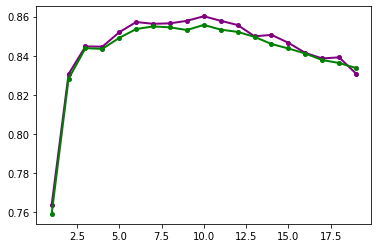

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
score_test=[]
score=[]
N=[]
for i in range(1,20):
    pipeline = make_pipeline(
      DictVectorizer(),
      DecisionTreeClassifier(max_depth=i)
    )
    pip=pipeline.fit(X_train_dicts,Y_train)
    Y_guess = pip.predict(X_test_dicts)
    score.append(cross_val_score(pip, X_train_dicts,Y_train, cv=5, scoring='accuracy').mean())
    score_test.append(accuracy_score(Y_test, Y_guess))
    N.append(i)
plt.plot(N,score_test,color='purple',marker='o', markerfacecolor='purple', markersize=4, linewidth=2)
plt.plot(N,score,color='green',marker='o', markerfacecolor='green', markersize=4, linewidth=2)

# Underfitting and overfitting in random forest classifiers. 
Replace the DecisionTreeClassifier with a RandomForestClassifier. 
The hyperparameter n_estimators defines the number of decision trees used in ensemble. 
Investigate how the underfitting/overfitting curve is affected by the number of trees. You can investigate ensemble sizes ranging from 1 up until a few hundred. 
Hint. These experiments can take some time to run. When n_estimators is large, you can reduce the training time quite a bit by adjusting the hyperparameter n_jobs, which will train several trees in parallel. By default, only one CPU core is used, but if you set n_jobs=-1, all cores will be used. 

In [6]:
from sklearn.ensemble import  RandomForestClassifier
score_test=[]
score=[]
N=[]
for i in range(1,501,50):
    pipeline = make_pipeline(
      DictVectorizer(),
      RandomForestClassifier(n_estimators=i, n_jobs=-1)
    )
    pip=pipeline.fit(X_train_dicts,Y_train)
    Y_guess = pip.predict(X_test_dicts)
    score.append(cross_val_score(pip, X_train_dicts,Y_train, cv=5, scoring='accuracy').mean())
    score_test.append(accuracy_score(Y_test, Y_guess))
    N.append(i)
plt.plot(N,score_test,color='purple',marker='o', markerfacecolor='purple', markersize=4, linewidth=2)
plt.plot(N,score,color='green',marker='o', markerfacecolor='green', markersize=4, linewidth=2)

print(score_test[0])

KeyboardInterrupt: 

Some things that you might want to discuss in your report: 
What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference? 

The accuracy for random forest at the ensemble size 1 is not same as a decision tree. 

two reasons:

1. Random Forest uses a bootstrapped sub-sample of training set but the decision tree uses a whole training set 

2. The number of features are used in random forest is equal to the parameter max_features, however, the decision tree uses all the features. 

What happens with the curve for random forests as the ensemble size grows? 

as the ensemble size grows, the accuracy is increased and quickly converged.

What happens with the best observed test set accuracy as the ensemble size grows? 

it doesn't largely change the value as the ensemble size grows.

What happens with the training time as the ensemble size grows? 

The traning time is increased as the ensemble size grows.

# Task 3: Feature importances in random forest classifiers
Decision trees and random forests are trained by computing importance scores for individual features in different ways: information gain, Gini impurity, variance reduction, etc. 
As a way to make our classifiers more interpretable, we can print the importance scores. In scikit-learn, decision trees and ensemble classifiers such as random forests all define an attribute called feature_importances_ (note the final underscore in this name). This is a NumPy array that stores the importance scores for each feature column in the training data matrix. For random forests and other tree ensembles, these importance scores are computed by averaging the scores when training all the different trees in the ensemble. 
To make these importance scores easier to understand, we can use the attribute feature_names_ (note the underscore again) in the DictVectorizer. 
Sort the features by importance scores in reverse order (so that the most important feature comes first), inspect the first few of these features, and try to reason about why you got this result. 

In [ ]:
import numpy as np

pipeline = make_pipeline(
      DictVectorizer(),
      RandomForestClassifier(n_estimators=2, n_jobs=-1)
    )
print(X_train_dicts)
pip=pipeline.fit(X_train_dicts,Y_train)
names= [name for name in pip.steps[0][1].feature_names_]
importances= [importance for importance in pip.steps[1][1].feature_importances_]
indices = np.argsort(importances)[::-1]
matrix=[importances[i] for i in indices]
name_matrix=[names[i] for i in indices]

plt.title('Feature Importances')
plt.bar(range(len(indices)), matrix,color="r", align="center")
plt.ylabel('Relative Importance')
plt.show()

print("the most important feature is " + name_matrix[0])


please also mention an alternative way to compute some sort of importance score of individual features. (You don't need to implement it.) Here, you can either use your common sense, or optionally read the discussion by Parr et al. (2018) that gives some criticism of decision tree-based feature importance scores and discusses some alternatives. 

drop-column importance method can be an alternative way to compute importance score which drop a entire column then compare the influence before and after the dropped column.